In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

## Cleanup Median Home Price dataset

In [2]:
df=pd.read_csv("Resources/medianhomeprice.csv")
df.head()

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
0,"Chicago, IL",2/12/2020,$133K,-5.80%,-1.30%,"1,566",11.10%,9.90%,"3,588",22.90%,8.00%,"13,635",2.10%,-22.60%,93,4.0,5.0,94.80%,-0.20%,-1.10%
1,"Chicago, IL",3/12/2020,$155K,16.30%,3.30%,"2,006",28.10%,8.10%,"4,084",13.80%,-13.10%,"13,740",0.80%,-23.60%,98,5.0,7.0,95.20%,0.40%,-0.80%
2,"Chicago, IL",4/12/2020,$170K,9.70%,12.20%,"2,192",9.30%,14.60%,"3,795",-7.10%,-2.10%,"13,645",-0.70%,-23.80%,74,-24.0,-23.0,95.50%,0.20%,-0.10%
3,"Chicago, IL",5/12/2020,$192K,12.60%,11.70%,"2,493",13.70%,15.90%,"3,856",1.60%,2.60%,"13,462",-1.30%,-24.50%,66,-8.0,-16.0,96.20%,0.70%,0.00%
4,"Chicago, IL",6/12/2020,$199K,3.70%,5.70%,"2,748",10.20%,21.10%,"3,478",-9.80%,-5.20%,"13,089",-2.80%,-25.10%,60,-6.0,-21.0,96.30%,0.20%,1.00%


In [3]:
date=df["Month of Period End"].str.split("/",n = 2, expand = True)
month=pd.to_numeric(date[0])
year=pd.to_numeric(date[1])+2000
date=pd.to_numeric(date[2])-2019
date_new=pd.DataFrame({"year":year,"month":month,"day":date})
date_new=pd.to_datetime(date_new, format='%m%d%y')
date_df=pd.DataFrame({"month_year":date_new})
date_df


,month_year
0,2012-02-01
1,2012-03-01
2,2012-04-01
3,2012-05-01
4,2012-06-01
...,...
25476,2020-01-01
25477,2020-02-01
25478,2020-03-01
25479,2020-04-01


In [4]:
date_df['month_year'] = pd.to_datetime(date_df['month_year']).dt.to_period('M')
date_df

,month_year
0,2012-02
1,2012-03
2,2012-04
3,2012-05
4,2012-06
...,...
25476,2020-01
25477,2020-02
25478,2020-03
25479,2020-04


In [5]:
df["month_year"]=date_df['month_year']
df.drop(columns=("Month of Period End"),inplace=True)
df

,Region,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY,month_year
0,"Chicago, IL",$133K,-5.80%,-1.30%,"1,566",11.10%,9.90%,"3,588",22.90%,8.00%,"13,635",2.10%,-22.60%,93,4.0,5.0,94.80%,-0.20%,-1.10%,2012-02
1,"Chicago, IL",$155K,16.30%,3.30%,"2,006",28.10%,8.10%,"4,084",13.80%,-13.10%,"13,740",0.80%,-23.60%,98,5.0,7.0,95.20%,0.40%,-0.80%,2012-03
2,"Chicago, IL",$170K,9.70%,12.20%,"2,192",9.30%,14.60%,"3,795",-7.10%,-2.10%,"13,645",-0.70%,-23.80%,74,-24.0,-23.0,95.50%,0.20%,-0.10%,2012-04
3,"Chicago, IL",$192K,12.60%,11.70%,"2,493",13.70%,15.90%,"3,856",1.60%,2.60%,"13,462",-1.30%,-24.50%,66,-8.0,-16.0,96.20%,0.70%,0.00%,2012-05
4,"Chicago, IL",$199K,3.70%,5.70%,"2,748",10.20%,21.10%,"3,478",-9.80%,-5.20%,"13,089",-2.80%,-25.10%,60,-6.0,-21.0,96.30%,0.20%,1.00%,2012-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25476,"Chicago, IL - Wrigleyville",$479K,5.20%,12.60%,14,-26.30%,55.60%,17,54.50%,142.90%,18,0.00%,80.00%,93,39.0,21.0,98.60%,0.10%,1.80%,2020-01
25477,"Chicago, IL - Wrigleyville",$525K,9.70%,24.30%,11,-21.40%,22.20%,26,52.90%,100.00%,25,38.90%,56.30%,91,-2.0,19.0,98.20%,-0.40%,1.30%,2020-02
25478,"Chicago, IL - Wrigleyville",$475K,-9.50%,18.80%,12,9.10%,33.30%,28,7.70%,3.70%,23,-8.00%,-8.00%,75,-17.0,3.0,98.60%,0.40%,0.80%,2020-03
25479,"Chicago, IL - Wrigleyville",$485K,2.10%,15.50%,17,41.70%,88.90%,25,-10.70%,-32.40%,19,-17.40%,-24.00%,58,-17.0,23.0,97.70%,-0.90%,-1.30%,2020-04


In [6]:
df['Median Sale Price'] = df['Median Sale Price'].str.replace('K', '').str.replace('$','').str.replace(',','').astype(float)
#df['Median Sale Price YoY'] = df['Median Sale Price MoM'].str.replace('%', '').astype(float)
df['Homes Sold'] = df['Homes Sold'].str.replace(',','').astype(float)
#df['Homes Sold MoM'] = df['Homes Sold MoM '].astype(float)
# df['Homes Sold YoY'] = df['Homes Sold YoY'].str.replace('%', '').astype(float)
df['New Listings']=df['New Listings'].str.replace(',','').astype(float)
# df['New Listings MoM'] = df['New Listings MoM'].str.replace('%', '').astype(float)
# df['New Listings YoY'] = df['New Listings YoY'].str.replace('%', '').astype(float)
df["Inventory"] = df["Inventory"].str.replace(',','').astype(float)
# df['Inventory MoM'] = df['Inventory MoM'].str.replace('%', '').astype(float)
# df['Inventory YoY'] = df['Inventory YoY'].str.replace('%', '').astype(float)
df['Days on Market'] = df['Days on Market'].str.replace(',','').astype(float)
df['Days on Market MoM'] = df['Days on Market MoM'].astype(float)
df['Days on Market YoY'] = df['Days on Market YoY'].astype(float)
# df['Average Sale To List'] = df['Average Sale To List'].str.replace('%','').astype(float)
# df['Average Sale To List MoM'] = df['Average Sale To List MoM'].str.replace('%', '').astype(float)
# df['Average Sale To List YoY'] = df['Average Sale To List YoY'].str.replace('%', '').astype(float)
df

,Region,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY,month_year
0,"Chicago, IL",133.0,-5.80%,-1.30%,1566.0,11.10%,9.90%,3588.0,22.90%,8.00%,13635.0,2.10%,-22.60%,93.0,4.0,5.0,94.80%,-0.20%,-1.10%,2012-02
1,"Chicago, IL",155.0,16.30%,3.30%,2006.0,28.10%,8.10%,4084.0,13.80%,-13.10%,13740.0,0.80%,-23.60%,98.0,5.0,7.0,95.20%,0.40%,-0.80%,2012-03
2,"Chicago, IL",170.0,9.70%,12.20%,2192.0,9.30%,14.60%,3795.0,-7.10%,-2.10%,13645.0,-0.70%,-23.80%,74.0,-24.0,-23.0,95.50%,0.20%,-0.10%,2012-04
3,"Chicago, IL",192.0,12.60%,11.70%,2493.0,13.70%,15.90%,3856.0,1.60%,2.60%,13462.0,-1.30%,-24.50%,66.0,-8.0,-16.0,96.20%,0.70%,0.00%,2012-05
4,"Chicago, IL",199.0,3.70%,5.70%,2748.0,10.20%,21.10%,3478.0,-9.80%,-5.20%,13089.0,-2.80%,-25.10%,60.0,-6.0,-21.0,96.30%,0.20%,1.00%,2012-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25476,"Chicago, IL - Wrigleyville",479.0,5.20%,12.60%,14.0,-26.30%,55.60%,17.0,54.50%,142.90%,18.0,0.00%,80.00%,93.0,39.0,21.0,98.60%,0.10%,1.80%,2020-01
25477,"Chicago, IL - Wrigleyville",525.0,9.70%,24.30%,11.0,-21.40%,22.20%,26.0,52.90%,100.00%,25.0,38.90%,56.30%,91.0,-2.0,19.0,98.20%,-0.40%,1.30%,2020-02
25478,"Chicago, IL - Wrigleyville",475.0,-9.50%,18.80%,12.0,9.10%,33.30%,28.0,7.70%,3.70%,23.0,-8.00%,-8.00%,75.0,-17.0,3.0,98.60%,0.40%,0.80%,2020-03
25479,"Chicago, IL - Wrigleyville",485.0,2.10%,15.50%,17.0,41.70%,88.90%,25.0,-10.70%,-32.40%,19.0,-17.40%,-24.00%,58.0,-17.0,23.0,97.70%,-0.90%,-1.30%,2020-04


In [7]:
df=df[['Region','month_year','Median Sale Price','Homes Sold','New Listings','Inventory','Days on Market','Days on Market MoM','Days on Market YoY']]
df

,Region,month_year,Median Sale Price,Homes Sold,New Listings,Inventory,Days on Market,Days on Market MoM,Days on Market YoY
0,"Chicago, IL",2012-02,133.0,1566.0,3588.0,13635.0,93.0,4.0,5.0
1,"Chicago, IL",2012-03,155.0,2006.0,4084.0,13740.0,98.0,5.0,7.0
2,"Chicago, IL",2012-04,170.0,2192.0,3795.0,13645.0,74.0,-24.0,-23.0
3,"Chicago, IL",2012-05,192.0,2493.0,3856.0,13462.0,66.0,-8.0,-16.0
4,"Chicago, IL",2012-06,199.0,2748.0,3478.0,13089.0,60.0,-6.0,-21.0
...,...,...,...,...,...,...,...,...,...
25476,"Chicago, IL - Wrigleyville",2020-01,479.0,14.0,17.0,18.0,93.0,39.0,21.0
25477,"Chicago, IL - Wrigleyville",2020-02,525.0,11.0,26.0,25.0,91.0,-2.0,19.0
25478,"Chicago, IL - Wrigleyville",2020-03,475.0,12.0,28.0,23.0,75.0,-17.0,3.0
25479,"Chicago, IL - Wrigleyville",2020-04,485.0,17.0,25.0,19.0,58.0,-17.0,23.0


In [8]:
region=df.groupby(df["Region"])
region_price=pd.DataFrame(region["Median Sale Price"].mean())
region_price.sort_values(by='Median Sale Price', ascending=False)[0:10]

,Median Sale Price
Region,
"Chicago, IL - DePaul",707.73
"Chicago, IL - Sheffield",682.00
"Chicago, IL - Magnificent Mile",669.48
"Chicago, IL - St. Ben's",638.98
"Chicago, IL - West DePaul",634.37
"Chicago, IL - Ranch Triangle",596.18
"Chicago, IL - Lathrop",590.16
"Chicago, IL - South East Ravenswood",563.02
"Chicago, IL - Roscoe Village",546.98


In [9]:
df.to_csv("Resources/home_price_clean.csv", encoding="utf-8", index=True)

## Cleanup Building Permit dataset

In [10]:
data=pd.read_csv("Building_Permits.csv")
data.head()

,version https://git-lfs.github.com/spec/v1
0,oid sha256:49a929e42ca6b12ffd0a58fe5f348bcdb28...
1,size 367953453


In [11]:
data_1=data[['ID','PERMIT#','ISSUE_DATE','LATITUDE', 'LONGITUDE', 'LOCATION','STREET_NUMBER','STREET DIRECTION','STREET_NAME','SUFFIX']]
data_1.dropna(how='any', inplace=True)
data_1.reset_index(inplace=True)
data_1.drop(columns=["index"],inplace=True)
data_1

KeyError: "None of [Index(['ID', 'PERMIT#', 'ISSUE_DATE', 'LATITUDE', 'LONGITUDE', 'LOCATION',\n       'STREET_NUMBER', 'STREET DIRECTION', 'STREET_NAME', 'SUFFIX'],\n      dtype='object')] are in the [columns]"

In [ ]:
data_1["address"]=data_1["STREET_NUMBER"].astype(str) +" "+ data_1["STREET DIRECTION"]+" "+data_1["STREET_NAME"]+" "+data_1["SUFFIX"]
data_1

In [ ]:
data_1['month_year'] = pd.to_datetime(data_1['ISSUE_DATE']).dt.to_period('M')
data_1

In [12]:
count_df=data_1.groupby(data_1["month_year"]).count()
count_df

NameError: name 'data_1' is not defined

In [13]:
count_df.reset_index(inplace=True)
count_df

NameError: name 'count_df' is not defined

## Chicago home price vs. building permits

In [14]:
chicago_df=df.loc[df["Region"]=="Chicago, IL"]
chicago_df

,Region,month_year,Median Sale Price,Homes Sold,New Listings,Inventory,Days on Market,Days on Market MoM,Days on Market YoY
0,"Chicago, IL",2012-02,133.0,1566.0,3588.0,13635.0,93.0,4.0,5.0
1,"Chicago, IL",2012-03,155.0,2006.0,4084.0,13740.0,98.0,5.0,7.0
2,"Chicago, IL",2012-04,170.0,2192.0,3795.0,13645.0,74.0,-24.0,-23.0
3,"Chicago, IL",2012-05,192.0,2493.0,3856.0,13462.0,66.0,-8.0,-16.0
4,"Chicago, IL",2012-06,199.0,2748.0,3478.0,13089.0,60.0,-6.0,-21.0
...,...,...,...,...,...,...,...,...,...
95,"Chicago, IL",2020-01,265.0,1835.0,3101.0,8586.0,67.0,7.0,0.0
96,"Chicago, IL",2020-02,281.0,1851.0,3898.0,8662.0,75.0,8.0,1.0
97,"Chicago, IL",2020-03,315.0,2462.0,3648.0,8822.0,52.0,-23.0,-8.0
98,"Chicago, IL",2020-04,330.0,2360.0,2261.0,8685.0,26.0,-26.0,-14.0


In [15]:
price_permit=pd.merge(chicago_df,count_df,on="month_year",how="left")
chicago_df=price_permit.iloc[:,0:15]
chicago_df.rename(columns={"ID":"Permit_Count"},inplace=True)
chicago_df

NameError: name 'count_df' is not defined

In [16]:
from scipy.stats import linregress
x=chicago_df["Median Sale Price"]
y=chicago_df["Permit_Count"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(225,2500),fontsize=15,color="red")
plt.title("Building Permits Issued vs.Chicago home price")
plt.xlabel('Median Sale Price (in $1000)')
plt.ylabel('Building Permit Count')
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.savefig("output/price_permit.png")
plt.show()

KeyError: 'Permit_Count'

## Plot Home price vs. Inventory

The r-squared is: 0.02935596294767


FileNotFoundError: [Errno 2] No such file or directory: 'output/price_inventory.png'

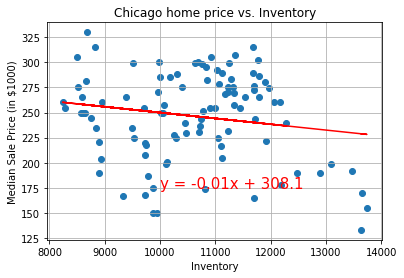

In [17]:
from scipy.stats import linregress
y=chicago_df["Median Sale Price"]
x=chicago_df["Inventory"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(10000,175),fontsize=15,color="red")
plt.title("Chicago home price vs. Inventory")
plt.xlabel('Inventory')
plt.ylabel('Median Sale Price (in $1000)')
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.savefig("output/price_inventory.png")
plt.show()

## Plot Home prive vs. Days on Market

In [ ]:
x=chicago_df["Median Sale Price"]
y=chicago_df["Days on Market"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(150,40),fontsize=15,color="red")
plt.title(" Days on Market vs. Chicago home price between 2012 and 2020")
plt.ylabel('Days on Market')
plt.xlabel('Median Sale Price (in $1000)')
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.savefig("output/price_daysonmarket.png")
plt.show()

The r-squared is: 0.11082675176856059


FileNotFoundError: [Errno 2] No such file or directory: 'output/price_newlisting.png'

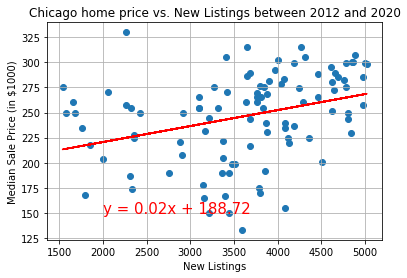

In [18]:
y=chicago_df["Median Sale Price"]
x=chicago_df["New Listings"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(2000,150),fontsize=15,color="red")
plt.title("Chicago home price vs. New Listings between 2012 and 2020")
plt.xlabel('New Listings')
plt.ylabel('Median Sale Price (in $1000)')
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.savefig("output/price_newlisting.png")
plt.show()

## Cleanup interest rate dataset

In [19]:
rate_df=pd.read_csv("Resources/mortgage_rates_monthly.csv")
rate_df.head()

,DATE,MORTGAGE30US
0,1/1/2007,6.2175
1,2/1/2007,6.2850
2,3/1/2007,6.1560
3,4/1/2007,6.1800
4,5/1/2007,6.2620


In [20]:
rate_df['DATE'] = pd.to_datetime(rate_df['DATE']).dt.to_period('M')
rate_df

,DATE,MORTGAGE30US
0,2007-01,6.217500
1,2007-02,6.285000
2,2007-03,6.156000
3,2007-04,6.180000
4,2007-05,6.262000
...,...,...
158,2020-03,3.450000
159,2020-04,3.306000
160,2020-05,3.232500
161,2020-06,3.162500


In [21]:
rate_df.rename(columns={"DATE":"month_year","MORTGAGE30US":"30Year Fixed Mortgage Rate"}, inplace=True)
rate_df

,month_year,30Year Fixed Mortgage Rate
0,2007-01,6.217500
1,2007-02,6.285000
2,2007-03,6.156000
3,2007-04,6.180000
4,2007-05,6.262000
...,...,...
158,2020-03,3.450000
159,2020-04,3.306000
160,2020-05,3.232500
161,2020-06,3.162500


## Home price vs. mortgage rate

In [22]:
price_rate=pd.merge(chicago_df,rate_df,on="month_year",how="left")
price_rate

,Region,month_year,Median Sale Price,Homes Sold,New Listings,Inventory,Days on Market,Days on Market MoM,Days on Market YoY,30Year Fixed Mortgage Rate
0,"Chicago, IL",2012-02,133.0,1566.0,3588.0,13635.0,93.0,4.0,5.0,3.8900
1,"Chicago, IL",2012-03,155.0,2006.0,4084.0,13740.0,98.0,5.0,7.0,3.9540
2,"Chicago, IL",2012-04,170.0,2192.0,3795.0,13645.0,74.0,-24.0,-23.0,3.9100
3,"Chicago, IL",2012-05,192.0,2493.0,3856.0,13462.0,66.0,-8.0,-16.0,3.7980
4,"Chicago, IL",2012-06,199.0,2748.0,3478.0,13089.0,60.0,-6.0,-21.0,3.6750
...,...,...,...,...,...,...,...,...,...,...
95,"Chicago, IL",2020-01,265.0,1835.0,3101.0,8586.0,67.0,7.0,0.0,3.6240
96,"Chicago, IL",2020-02,281.0,1851.0,3898.0,8662.0,75.0,8.0,1.0,3.4650
97,"Chicago, IL",2020-03,315.0,2462.0,3648.0,8822.0,52.0,-23.0,-8.0,3.4500
98,"Chicago, IL",2020-04,330.0,2360.0,2261.0,8685.0,26.0,-26.0,-14.0,3.3060


## Plot Mortgage Rate over time

FileNotFoundError: [Errno 2] No such file or directory: 'output/rates.png'

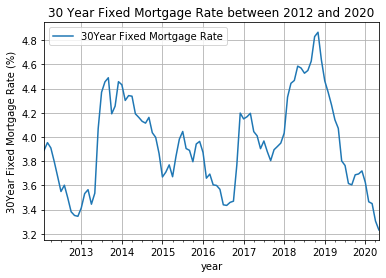

In [23]:
import matplotlib.pyplot as plt
line = price_rate.plot.line(x='month_year', y='30Year Fixed Mortgage Rate')

line.set_xlabel("year")
line.set_ylabel("30Year Fixed Mortgage Rate (%)")
line.set_title("30 Year Fixed Mortgage Rate between 2012 and 2020")
plt.grid()
plt.savefig("output/rates.png")

## Plot Median Home Price over time

In [ ]:
line = price_rate.plot.line(x='month_year', y='Median Sale Price')

line.set_xlabel("year")
line.set_ylabel("Home Price (in $1000)")
line.set_title("Chicago Median Home Price between 2012 and 2020")
plt.grid()
plt.savefig("output/price_overtime.png")

## Median Home Price vs. Mortgage Rate

The r-squared is: 0.024454583262606872


FileNotFoundError: [Errno 2] No such file or directory: 'output/price_rate.png'

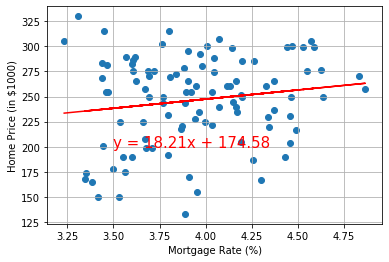

In [24]:
y=price_rate["Median Sale Price"]
x=price_rate["30Year Fixed Mortgage Rate"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(3.5,200),fontsize=15,color="red")
plt.xlabel('Mortgage Rate (%)')
plt.ylabel('Home Price (in $1000)')
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.savefig("output/price_rate.png")
plt.show()

In [25]:
raw_sbif_data = pd.read_csv("Resources/SBIF_table.csv")
#raw_sbif_data = raw_sbif_data.reset_index()
#raw_sbif_data = raw_sbif_data.rename(columns=raw_sbif_data.iloc[0])
#raw_sbif_data = raw_sbif_data.drop(raw_sbif_data.index[0])
raw_sbif_data

,Month,Year,Grant Amount,Leveraged Resources,Month - Numeric,Year-Month
0,January,2011,446992.74,301234.12,1,2011-01
1,February,2011,550624.85,558775.10,2,2011-02
2,March,2011,2479399.55,2964604.20,3,2011-03
3,April,2011,283541.81,436046.92,4,2011-04
4,May,2011,940904.74,1555789.72,5,2011-05
...,...,...,...,...,...,...
93,October,2018,280571.15,241911.02,10,2018-10
94,November,2018,527944.49,298428.08,11,2018-11
95,December,2018,557061.88,331886.50,12,2018-12
96,January,2019,959093.24,1041513.08,1,2019-01


In [26]:
sbif_data = raw_sbif_data[["Month - Numeric", "Year", "Grant Amount"]]
sbif_data

,Month - Numeric,Year,Grant Amount
0,1,2011,446992.74
1,2,2011,550624.85
2,3,2011,2479399.55
3,4,2011,283541.81
4,5,2011,940904.74
...,...,...,...
93,10,2018,280571.15
94,11,2018,527944.49
95,12,2018,557061.88
96,1,2019,959093.24


In [27]:
sbif_data["Grant Amount"]

0      446992.74
1      550624.85
2     2479399.55
3      283541.81
4      940904.74
         ...    
93     280571.15
94     527944.49
95     557061.88
96     959093.24
97     980511.29
Name: Grant Amount, Length: 98, dtype: float64

In [28]:
sbif_data["Grant Amount"] = sbif_data["Grant Amount"].astype(float)

C:\Users\cbere\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
sbif_data = sbif_data.groupby("Year").sum()
sbif_data

,Month - Numeric,Grant Amount
Year,,
2011,78,10827639.88
2012,78,13709649.19
2013,78,10014629.51
2014,78,8077828.00
2015,78,7159098.44
2016,78,7385907.77
2017,78,7748050.14
2018,78,5882511.29
2019,3,1939604.53


Text(0.5, 1.0, 'Grants allocated by City of Chicago via Small Business Improvement Fund (SBIF)')

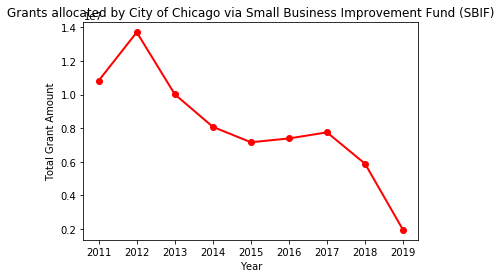

In [30]:
x = sbif_data.index
y = sbif_data["Grant Amount"]
plt.plot(x,y, linewidth=2, marker = 'o', color = 'r')
plt.xlabel("Year")
plt.ylabel("Total Grant Amount")
plt.title("Grants allocated by City of Chicago via Small Business Improvement Fund (SBIF)")

In [31]:
med_prices = pd.read_csv("Resources/medianhomeprice.csv")
# med_prices = med_prices.reset_index()
# med_prices = med_prices.rename(columns=med_prices.iloc[0])
# med_prices = med_prices.drop(med_prices.index[0])
med_prices

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
0,"Chicago, IL",2/12/2020,$133K,-5.80%,-1.30%,"1,566",11.10%,9.90%,"3,588",22.90%,8.00%,"13,635",2.10%,-22.60%,93,4.0,5.0,94.80%,-0.20%,-1.10%
1,"Chicago, IL",3/12/2020,$155K,16.30%,3.30%,"2,006",28.10%,8.10%,"4,084",13.80%,-13.10%,"13,740",0.80%,-23.60%,98,5.0,7.0,95.20%,0.40%,-0.80%
2,"Chicago, IL",4/12/2020,$170K,9.70%,12.20%,"2,192",9.30%,14.60%,"3,795",-7.10%,-2.10%,"13,645",-0.70%,-23.80%,74,-24.0,-23.0,95.50%,0.20%,-0.10%
3,"Chicago, IL",5/12/2020,$192K,12.60%,11.70%,"2,493",13.70%,15.90%,"3,856",1.60%,2.60%,"13,462",-1.30%,-24.50%,66,-8.0,-16.0,96.20%,0.70%,0.00%
4,"Chicago, IL",6/12/2020,$199K,3.70%,5.70%,"2,748",10.20%,21.10%,"3,478",-9.80%,-5.20%,"13,089",-2.80%,-25.10%,60,-6.0,-21.0,96.30%,0.20%,1.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25476,"Chicago, IL - Wrigleyville",1/20/2020,$479K,5.20%,12.60%,14,-26.30%,55.60%,17,54.50%,142.90%,18,0.00%,80.00%,93,39.0,21.0,98.60%,0.10%,1.80%
25477,"Chicago, IL - Wrigleyville",2/20/2020,$525K,9.70%,24.30%,11,-21.40%,22.20%,26,52.90%,100.00%,25,38.90%,56.30%,91,-2.0,19.0,98.20%,-0.40%,1.30%
25478,"Chicago, IL - Wrigleyville",3/20/2020,$475K,-9.50%,18.80%,12,9.10%,33.30%,28,7.70%,3.70%,23,-8.00%,-8.00%,75,-17.0,3.0,98.60%,0.40%,0.80%
25479,"Chicago, IL - Wrigleyville",4/20/2020,$485K,2.10%,15.50%,17,41.70%,88.90%,25,-10.70%,-32.40%,19,-17.40%,-24.00%,58,-17.0,23.0,97.70%,-0.90%,-1.30%


In [32]:
dom_yoy = med_prices[["Month of Period End", "Days on Market YoY"]]
dom_yoy

,Month of Period End,Days on Market YoY
0,2/12/2020,5.0
1,3/12/2020,7.0
2,4/12/2020,-23.0
3,5/12/2020,-16.0
4,6/12/2020,-21.0
...,...,...
25476,1/20/2020,21.0
25477,2/20/2020,19.0
25478,3/20/2020,3.0
25479,4/20/2020,23.0


In [33]:
date=dom_yoy["Month of Period End"].str.split("/",n = 2, expand = True)
Year = date[1]
pd.to_numeric(Year)
Year = pd.to_numeric(Year) + 2000
Year

0        2012
1        2012
2        2012
3        2012
4        2012
         ... 
25476    2020
25477    2020
25478    2020
25479    2020
25480    2020
Name: 1, Length: 25481, dtype: int64

In [34]:
dom_yoy["Year"]= Year
dom_yoy = dom_yoy.drop(columns = ["Month of Period End"])
dom_yoy

C:\Users\cbere\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Days on Market YoY,Year
0,5.0,2012
1,7.0,2012
2,-23.0,2012
3,-16.0,2012
4,-21.0,2012
...,...,...
25476,21.0,2020
25477,19.0,2020
25478,3.0,2020
25479,23.0,2020


In [35]:
dom_yoy["Days on Market YoY"] = dom_yoy["Days on Market YoY"].astype(float)
dom_yoy["Days on Market YoY"] = dom_yoy["Days on Market YoY"].round()
dom_yoy = dom_yoy.groupby("Year").mean()
dom_yoy

,Days on Market YoY
Year,
2012,-18.577810
2013,-19.988337
2014,-6.095317
2015,2.761556
2016,-4.982661
2017,-1.136849
2018,-0.730936
2019,2.576859
2020,-1.242498


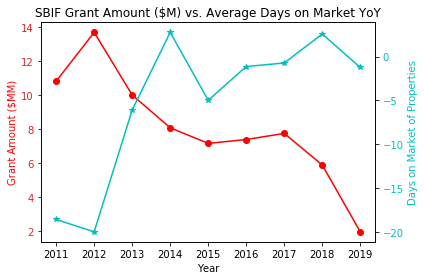

In [36]:
x = sbif_data.index
y1 = sbif_data["Grant Amount"]
y2 = dom_yoy["Days on Market YoY"]

fig, ax1 = plt.subplots()

color = "red"
ax1.set_xlabel('Year')
ax1.set_ylabel('Grant Amount ($MM)', color=color)
ax1.plot(x, y1, marker = 'o', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yticklabels(["0","2", "4", "6", "8", "10", "12", "14"], color="tab:red", size=10)

ax2 = ax1.twinx()

color = "c"
ax2.set_ylabel('Days on Market of Properties', color=color)
ax2.plot(x, y2, marker = '*', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("SBIF Grant Amount ($M) vs. Average Days on Market YoY")
fig.tight_layout()
plt.show()

C:\Users\cbere\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


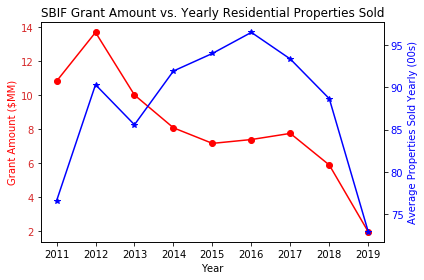

In [37]:
homes_sold = med_prices[["Month of Period End", "Homes Sold"]]
date=homes_sold["Month of Period End"].str.split("/",n = 2, expand = True)
Year = date[1]
pd.to_numeric(Year)
Year = pd.to_numeric(Year) + 2000
homes_sold["Year"]= Year
homes_sold = homes_sold.drop(columns = ["Month of Period End"])
homes_sold["Homes Sold"] = homes_sold["Homes Sold"].str.replace(',', '')

homes_sold["Homes Sold"] = homes_sold["Homes Sold"].astype(int)
homes_sold["Homes Sold"] = homes_sold["Homes Sold"].round()
homes_sold = homes_sold.groupby("Year").mean()


x = sbif_data.index
y1 = sbif_data["Grant Amount"]
y2 = homes_sold["Homes Sold"]




fig, ax1 = plt.subplots()

color = "red"
ax1.set_xlabel('Year')
ax1.set_ylabel('Grant Amount ($MM)', color=color)
ax1.plot(x, y1, marker = 'o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.set_yticklabels(["0","2", "4", "6", "8", "10", "12", "14"], color="tab:red", size=10)


ax2 = ax1.twinx()

color = "blue"
ax2.set_ylabel('Average Properties Sold Yearly (00s)', color=color)
ax2.plot(x, y2, marker = '*', color=color)
ax2.tick_params(labelcolor=color)

plt.title("SBIF Grant Amount vs. Yearly Residential Properties Sold")
fig.tight_layout()
plt.show()

In [38]:
raw_permit = pd.read_csv("Resources/permit_count.csv")
date1=raw_permit["month_year"].str.split("-",n = 2, expand = True)
raw_permit = raw_permit.join(date1)
raw_permit.rename(columns = {0 : "YEAR", 1: "MONTH"}, inplace = True)
raw_permit

,month_year,ID,PERMIT#,ISSUE_DATE,LATITUDE,LONGITUDE,LOCATION,YEAR,MONTH
0,2006-01,3978,3978,3978,3978,3978,3978,2006,01
1,2006-02,3829,3829,3829,3829,3829,3829,2006,02
2,2006-03,4718,4718,4718,4718,4718,4718,2006,03
3,2006-04,3774,3774,3774,3774,3774,3774,2006,04
4,2006-05,4188,4188,4188,4188,4188,4188,2006,05
...,...,...,...,...,...,...,...,...,...
170,2020-03,3667,3667,3667,3667,3667,3667,2020,03
171,2020-04,3225,3225,3225,3225,3225,3225,2020,04
172,2020-05,3045,3045,3045,3045,3045,3045,2020,05
173,2020-06,3612,3612,3612,3612,3612,3612,2020,06


In [39]:
permit_count = raw_permit[["PERMIT#", "YEAR"]]
permit_count = permit_count.groupby("YEAR").sum()
permit_count

,PERMIT#
YEAR,
2006,46697
2007,47682
2008,41168
2009,39973
2010,38894
2011,36696
2012,38421
2013,40403
2014,43879


In [40]:
permit_slice = permit_count.iloc[5:14]
permit_slice

,PERMIT#
YEAR,
2011,36696
2012,38421
2013,40403
2014,43879
2015,44522
2016,45891
2017,47167
2018,46885
2019,48516


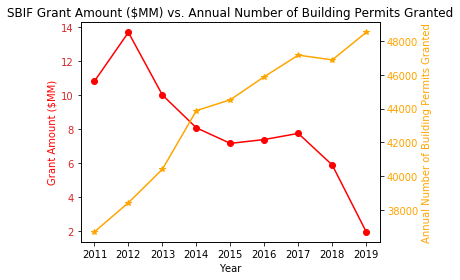

In [41]:
x = sbif_data.index
y1 = sbif_data["Grant Amount"]
y2 = permit_slice["PERMIT#"]

fig, ax1 = plt.subplots()

color = "red"
ax1.set_xlabel('Year')
ax1.set_ylabel('Grant Amount ($MM)', color=color)
ax1.plot(x, y1, marker = 'o', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yticklabels(["0","2", "4", "6", "8", "10", "12", "14"], color="tab:red", size=10)

ax2 = ax1.twinx()

color = "orange"
ax2.set_ylabel('Annual Number of Building Permits Granted', color=color)
ax2.plot(x, y2, marker = '*', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("SBIF Grant Amount ($MM) vs. Annual Number of Building Permits Granted")
fig.tight_layout()
plt.show()

In [42]:
mmrp = pd.read_csv("Resources/MMRP 2011 to 2020.csv")
mmrp

,Building,Year
0,BLDG,2011
1,BLDG,2011
2,BLDG,2011
3,BLDG,2011
4,BLDG,2011
...,...,...
115180,CASE,2020
115181,CASE,2020
115182,CASE,2020
115183,CASE,2020


In [43]:
mmrp_yearly = mmrp.groupby("Year").count()
mmrp_yearly
mmrp_yearly = mmrp_yearly.iloc[0:9]
mmrp_yearly

,Building
Year,
2011,13217
2012,13145
2013,10517
2014,12291
2015,15093
2016,13089
2017,11771
2018,11314
2019,10931


In [44]:
mmrp_count = mmrp_yearly["Building"]
mmrp_count

Year
2011    13217
2012    13145
2013    10517
2014    12291
2015    15093
2016    13089
2017    11771
2018    11314
2019    10931
Name: Building, dtype: int64

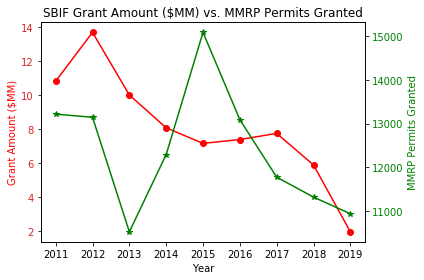

In [45]:
x = sbif_data.index
y1 = sbif_data["Grant Amount"]
y2 = mmrp_yearly["Building"]

fig, ax1 = plt.subplots()

color = "red"
ax1.set_xlabel('Year')
ax1.set_ylabel('Grant Amount ($MM)', color=color)
ax1.plot(x, y1, marker = 'o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.set_yticklabels(["0","2", "4", "6", "8", "10", "12", "14"], color="tab:red", size=10)


ax2 = ax1.twinx()

color = "g"
ax2.set_ylabel('MMRP Permits Granted', color=color)
ax2.plot(x, y2, marker = '*', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("SBIF Grant Amount ($MM) vs. MMRP Permits Granted")
fig.tight_layout()
plt.show()

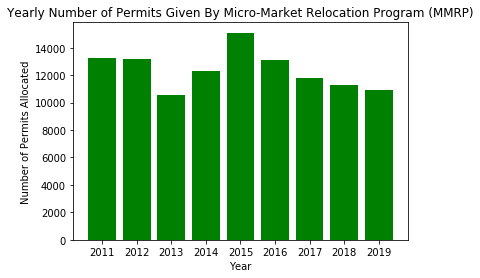

In [46]:
x_axis = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

fig , ax1 = plt.subplots()

plt.bar(x_axis, mmrp_count, color='green', alpha=1, align="center")
width = 1
ax1.set_xticks((2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019))
plt.title("Yearly Number of Permits Given By Micro-Market Relocation Program (MMRP)")
plt.xlabel("Year")
plt.ylabel("Number of Permits Allocated")
plt.show()

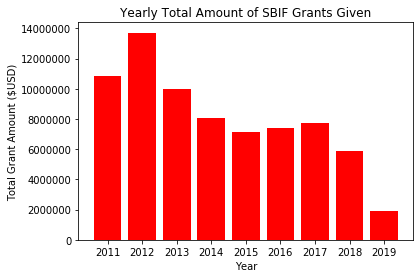

In [47]:
x_axis = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
fig , ax1 = plt.subplots()

plt.bar(x_axis, y1, color='r', alpha=1, align="center")
width = 1
ax1.set_xticks((2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019))
plt.title("Yearly Total Amount of SBIF Grants Given")
plt.xlabel("Year")
plt.ylabel("Total Grant Amount ($USD)")
ax1.ticklabel_format(style = "plain")

plt.show()

In [48]:
homes_sold

,Homes Sold
Year,
2012,76.570050
2013,90.325384
2014,85.587084
2015,91.944136
2016,94.022936
2017,96.516519
2018,93.361202
2019,88.668517
2020,72.913629


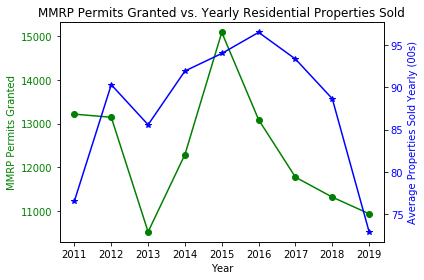

In [49]:
x = sbif_data.index
y1 = mmrp_count
y2 = homes_sold["Homes Sold"]



fig, ax1 = plt.subplots()

color = "green"
ax1.set_xlabel('Year')
ax1.set_ylabel('MMRP Permits Granted', color=color)
ax1.plot(x, y1, marker = 'o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = "blue"
ax2.set_ylabel('Average Properties Sold Yearly (00s)', color=color)
ax2.plot(x, y2, marker = '*', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("MMRP Permits Granted vs. Yearly Residential Properties Sold")
fig.tight_layout()
plt.show()

In [50]:
#Reads in the school info for every chicago public school during the 2017-2018 year
path_school_info = "Resources/School Progress Reports & Info/CPS_School_Profile_Information_SY1718.csv"
schoolinfo_df = pd.read_csv(path_school_info)

# Reads in the school latitude and longitude with 3 years (2015-2018) listing out the neighborhood locale
path_locations0809 = "Resources/School Locations/CPS_School_Locations_SY0809.csv"
path_locations0910 = "Resources/School Locations/CPS_School_Locations_SY0910.csv"
path_locations1011 = "Resources/School Locations/CPS_School_Locations_SY1011.csv"
path_locations1112 = "Resources/School Locations/CPS_School_Locations_SY1112.csv"
path_locations1213 = "Resources/School Locations/CPS_School_Locations_SY1213.csv"
path_locations1314 = "Resources/School Locations/CPS_School_Locations_SY1314.csv"
path_locations1415 = "Resources/School Locations/CPS_School_Locations_SY1415.csv"
path_locations1516 = "Resources/School Locations/CPS_School_Locations_SY1516.csv"
path_locations1617 = "Resources/School Locations/CPS_School_Locations_SY1617.csv"
path_locations1718 = "Resources/School Locations/CPS_School_Locations_SY1718.csv"
path_locations1819 = "Resources/School Locations/CPS_School_Locations_SY1718.csv"

# reads the locations csv file into dataframes.
school_locations0809_df = pd.read_csv(path_locations0809)
school_locations0910_df = pd.read_csv(path_locations0910)
school_locations1011_df = pd.read_csv(path_locations1011)
school_locations1112_df = pd.read_csv(path_locations1112)
school_locations1213_df = pd.read_csv(path_locations1213)
school_locations1314_df = pd.read_csv(path_locations1314)
school_locations1415_df = pd.read_csv(path_locations1415)
school_locations1516_df = pd.read_csv(path_locations1516)
school_locations1617_df = pd.read_csv(path_locations1617)
school_locations1718_df = pd.read_csv(path_locations1718)
school_locations1819_df = pd.read_csv(path_locations1819)


# reads the progress report information for each school from 2011-2012 to 2018-2019 excluding 2014-2015
path_progress1112 = "Resources/School Progress Reports & Info/School_Progress_Reports_SY1112.csv"
path_progress1213_elem = "Resources/School Progress Reports & Info/Elementary_School_Progress_Reports_SY1213.csv"
path_progress1213_hs = "Resources/School Progress Reports & Info/High_School_Progress_Reports_SY1213.csv"
path_progress1314_elem = "Resources/School Progress Reports & Info/Elementary_School_Progress_Reports_SY1314.csv"
path_progress1314_hs = "Resources/School Progress Reports & Info/High_School_Progress_Reports_SY1314.csv"
path_progress1516 = "Resources/School Progress Reports & Info/School_Progress_Reports_SY1516.csv"
path_progress1617 = "Resources/School Progress Reports & Info/School_Progress_Reports_SY1617.csv"
path_progress1718 = "Resources/School Progress Reports & Info/School_Progress_Reports_SY1718.csv"
path_progress1819 = "Resources/School Progress Reports & Info/School_Progress_Reports_SY1819.csv"



# prints the progress report information and places it in a dataframe.
school_progress1112 = pd.read_csv(path_progress1112)
school_progress1213_elem = pd.read_csv(path_progress1213_elem)
school_progress1213_hs = pd.read_csv(path_progress1213_hs)
school_progress1314_elem = pd.read_csv(path_progress1314_elem)
school_progress1314_hs = pd.read_csv(path_progress1314_hs)
school_progress1516 = pd.read_csv(path_progress1516)
school_progress1617 = pd.read_csv(path_progress1617)
school_progress1718 = pd.read_csv(path_progress1718)
school_progress1819 = pd.read_csv(path_progress1819)




# Renames the school name column in these dataframes to merge with the above dataframes.
school_progress1112 = school_progress1718.rename(columns = {"Name of School": "Long_Name"})
school_progress1213_elem = school_progress1718.rename(columns = {"School Name": "Long_Name"})
school_progress1213_hs = school_progress1718.rename(columns = {"School Name": "Long_Name"})
school_progress1314_elem = school_progress1718.rename(columns = {"Name of School": "Long_Name"})
school_progress1314_hs = school_progress1718.rename(columns = {"Name of School": "Long_Name"})

In [51]:
school_progress1617

,School_ID,Short_Name,Long_Name,School_Type,Primary_Category,Address,City,State,Zip,Phone,...,Mobility_Rate_Pct,Chronic_Truancy_Pct,Empty_Progress_Report_Message,School_Survey_Rating_Description,Supportive_School_Award,Supportive_School_Award_Desc,Parent_Survey_Results_Year,School_Latitude,School_Longitude,Location
0,610104,ONAHAN,William J Onahan Elementary School,Neighborhood,ES,6634 W RAVEN ST,Chicago,Illinois,60631,7735341180,...,11.0,NaN,NaN,This school is “Well-Organized for Improvement...,Established,This school has been rated Established for its...,2016.0,41.993790,-87.793108,"6634 W RAVEN ST\nChicago, Illinois 60631\n(41...."
1,610390,RICKOVER MILITARY HS,Hyman G Rickover Naval Academy High School,Military academy,HS,5900 N GLENWOOD AVE,Chicago,Illinois,60660,7735342890,...,3.2,NaN,NaN,This school is “Organized for Improvement” whi...,Established,This school has been rated Established for its...,2016.0,41.989021,-87.665789,"5900 N GLENWOOD AVE\nChicago, Illinois 60660\n..."
2,610070,MCPHERSON,James B McPherson Elementary School,Neighborhood,ES,4728 N WOLCOTT AVE,Chicago,Illinois,60640,7735342625,...,12.5,NaN,NaN,This school is “Organized for Improvement” whi...,Coming Soon,This school is in the process of being reviewe...,2016.0,41.967847,-87.676288,"4728 N WOLCOTT AVE\nChicago, Illinois 60640\n(..."
3,400117,NOBLE - HANSBERRY HS,Noble - Hansberry College Prep,Charter,HS,8748 S ABERDEEN ST,Chicago,Illinois,60620,7737293400,...,NaN,NaN,NaN,This school is “Well-Organized for Improvement...,Coming Soon,This school is in the process of being reviewe...,2016.0,41.734442,-87.650987,"8748 S ABERDEEN ST\nChicago, Illinois 60620\n(..."
4,610251,CATHER,Willa Cather Elementary School,Neighborhood,ES,2908 W WASHINGTON BLVD,Chicago,Illinois,60612,7735346780,...,34.2,NaN,NaN,This school is “Well-Organized for Improvement...,Coming Soon,This school is in the process of being reviewe...,2016.0,41.882950,-87.699187,"2908 W WASHINGTON BLVD\nChicago, Illinois 6061..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,400048,LEARN - EXCEL,L.E.A.R.N. - Excel Campus,Charter,ES,3021 W CARROLL AVE,Chicago,Illinois,60612,3122437001,...,NaN,NaN,NaN,This school is “Well-Organized for Improvement...,Coming Soon,This school is in the process of being reviewe...,2016.0,41.874687,-87.686568,"3021 W CARROLL AVE\nChicago, Illinois 60612\n(..."
657,609821,BURNHAM,Burnham Elementary Inclusive Academy,Neighborhood,ES,9928 S CRANDON AVE,Chicago,Illinois,60617,7735356530,...,31.8,NaN,NaN,This school is “Organized for Improvement” whi...,Established,This school has been rated Established for its...,2016.0,41.714402,-87.567131,"9928 S CRANDON AVE\nChicago, Illinois 60617\n(..."
658,609723,MARSHALL HS,John Marshall Metropolitan High School,Neighborhood,HS,3250 W ADAMS ST,Chicago,Illinois,60624,7735346455,...,57.2,NaN,NaN,This school is “Well-Organized for Improvement...,Coming Soon,This school is in the process of being reviewe...,2016.0,41.878444,-87.708050,"3250 W ADAMS ST\nChicago, Illinois 60624\n(41...."
659,610305,LELAND,George Leland Elementary School,Neighborhood,ES,512 S LAVERGNE AVE,Chicago,Illinois,60644,7735346340,...,41.4,NaN,NaN,This school is “Organized for Improvement” whi...,Coming Soon,This school is in the process of being reviewe...,2016.0,41.873587,-87.749276,"512 S LAVERGNE AVE\nChicago, Illinois 60644\n(..."


In [52]:
schooldata_0809 = pd.merge(school_locations0809_df, schoolinfo_df, on = "Short_Name", how = "outer")
schooldata_0910 = pd.merge(school_locations0910_df, schoolinfo_df, on = "Short_Name", how = "outer")
schooldata_1011 = pd.merge(school_locations1011_df, schoolinfo_df, on = "Short_Name", how = "outer")
schooldata_1112 = pd.merge(school_locations1112_df, schoolinfo_df, on = "Short_Name", how = "outer")
schooldata_1213 = pd.merge(school_locations1213_df, schoolinfo_df, on = "Short_Name", how = "outer")
schooldata_1314 = pd.merge(school_locations1314_df, schoolinfo_df, on = "Short_Name", how = "outer")
schooldata_1415 = pd.merge(school_locations1415_df, schoolinfo_df, on = "Short_Name", how = "outer")
schooldata_1516 = pd.merge(school_locations1516_df, schoolinfo_df, on = "Short_Name", how = "outer")
schooldata_1617 = pd.merge(school_locations1617_df, schoolinfo_df, on = "Short_Name", how = "outer")
schooldata_1718 = pd.merge(school_locations1718_df, schoolinfo_df, on = "Short_Name", how = "outer")
schooldata_1819 = pd.merge(school_locations1819_df, schoolinfo_df, on = "Short_Name", how = "outer")


schooldata_1819
# ex. school_final1718_elem = school_final1718.dropna(subset = ["Grade 3 ELA"])

,School_ID_x,Network_x,Short_Name,the_geom,Address,Zip,Governance,Grade_Cat,Grades,Lat,...,Network_y,Is_GoCPS_Participant,Is_GoCPS_PreK,Is_GoCPS_Elementary,Is_GoCPS_High_School,Open_For_Enrollment_Date,Closed_For_Enrollment_Date,School_Latitude,School_Longitude,Location
0,400010.0,Charter,ACE TECH HS,POINT (-87.62584903655835 41.79612150956602),5410 S STATE ST,60609.0,Charter,HS,"9, 10, 11, 12",41.796122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,400153.0,Charter,ACERO - BRIGHTON PARK,POINT (-87.69323838455642 41.81310944439286),4420 S FAIRFIELD AVE,60632.0,Charter,ES,"K, 1, 2, 3, 4, 5, 6, 7, 8",41.813109,...,Charter,N,N,N,N,7/1/2013 0:00,NaN,41.813109,-87.693238,"4420 S FAIRFIELD AVE\nChicago, Illinois 60632\..."
2,400101.0,Charter,ACERO - CISNEROS,POINT (-87.69399616198365 41.8228837404716),2744 W PERSHING RD,60632.0,Charter,ES,"K, 1, 2, 3, 4, 5, 6, 7, 8",41.822884,...,Charter,N,N,N,N,7/1/2010 0:00,NaN,41.822884,-87.693996,"2744 W PERSHING RD\nChicago, Illinois 60632\n(..."
3,400120.0,Charter,ACERO - CLEMENTE,POINT (-87.78783043795977 41.917951679001526),2050 N NATCHEZ AVE,60707.0,Charter,ES,"K, 1, 2, 3, 4, 5, 6, 7, 8",41.917952,...,Charter,N,N,N,N,7/1/2012 0:00,NaN,41.917952,-87.787830,"2050 N NATCHEZ AVE\nChicago, Illinois 60707\n(..."
4,400121.0,Charter,ACERO - DE LA CRUZ,POINT (-87.68440568153892 42.01647588165271),7416 N RIDGE BLVD,60645.0,Charter,ES,"K, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12",42.016476,...,Charter,Y,N,N,Y,7/1/2012 0:00,NaN,42.016476,-87.684406,"7416 N RIDGE AVE\nChicago, Illinois 60645\n(42..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,NaN,NaN,KIPP - ONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Charter,N,N,N,N,7/1/2016 0:00,NaN,41.893805,-87.726615,"730 N PULASKI\nChicago, Illinois 60624\n(41.89..."
675,NaN,NaN,NATIONAL TEACHERS HS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,N,N,NaN,NaN,7/1/2019 0:00,NaN,41.852602,-87.629235,"55 W CERMAK\nChicago, Illinois 60616\n(41.8526..."
676,NaN,NaN,SOR JUANA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Network 8,Y,N,Y,N,6/29/2018 0:00,NaN,41.789597,-87.726380,"4120 W 57TH\nChicago, Illinois 60629\n(41.7895..."
677,NaN,NaN,YCCS - PROGRESSIVE LEADERSHIP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Options,N,N,N,N,7/1/2012 0:00,NaN,41.773962,-87.615740,"6620 S DR MARTIN LUTHER KING JR DR\nChicago, I..."


In [53]:
# pulls out only the necessary information from the last dataframe and drops any null values in the new dataframe.
school_locale0809 = schooldata_0809[["Long_Name", "X", "Y", "SCH_ADDR", "Primary_Category","SCHOOL_ID"]].dropna()
school_locale0910 = schooldata_0910[["Long_Name", "X", "Y", "SCH_ADDR", "Primary_Category","SCHOOL_ID"]].dropna()
school_locale1011 = schooldata_1011[["Long_Name", "X", "Y", "SCH_ADDR", "Primary_Category","SCHOOL_ID"]].dropna()
school_locale1112 = schooldata_1112[["Long_Name", "X", "Y", "SCH_ADDR", "Primary_Category","SCHOOL_ID"]].dropna()
school_locale1213 = schooldata_1213[["Long_Name", "X", "Y", "SCH_ADDR", "Primary_Category","SCHOOL_ID"]].dropna()
school_locale1314 = schooldata_1314[["Long_Name", "X", "Y", "SCH_ADDR", "Primary_Category","SCHOOL_ID"]].dropna()
school_locale1415 = schooldata_1415[["Long_Name", "X", "Y", "SCH_ADDR", "Primary_Category","SCHOOL_ID"]].dropna()
school_locale1516 = schooldata_1516[["Long_Name", "Lat", "Long", "Address", "Primary_Category","School_ID_x", "COMMAREA"]].dropna()
school_locale1617 = schooldata_1617[["Long_Name", "Lat", "Long", "Address", "Primary_Category","School_ID_x", "COMMAREA"]].dropna()
school_locale1718 = schooldata_1718[["Long_Name", "Lat", "Long", "Address", "Primary_Category","School_ID_x", "COMMAREA"]].dropna()
school_locale1819 = schooldata_1819[["Long_Name", "Lat", "Long", "Address", "Primary_Category","School_ID_x", "COMMAREA"]].dropna()


#breaks down the locales by hs and es for every year that is included in the progress report, 11-12 to 18-19 excluding 14-15
school_locale1112_elem = school_locale1112[school_locale1112["Primary_Category"] == "ES"]
school_locale1112_hs = school_locale1112[school_locale1112["Primary_Category"] == "HS"]
school_locale1213_elem = school_locale1213[school_locale1213["Primary_Category"] == "ES"]
school_locale1213_hs = school_locale1213[school_locale1213["Primary_Category"] == "HS"]
school_locale1314_elem = school_locale1314[school_locale1314["Primary_Category"] == "ES"]
school_locale1314_hs = school_locale1314[school_locale1314["Primary_Category"] == "HS"]
school_locale1516_elem = school_locale1516[school_locale1516["Primary_Category"] == "ES"]
school_locale1516_hs = school_locale1516[school_locale1516["Primary_Category"] == "HS"]
school_locale1617_elem = school_locale1617[school_locale1617["Primary_Category"] == "ES"]
school_locale1617_hs = school_locale1617[school_locale1617["Primary_Category"] == "HS"]
school_locale1718_elem = school_locale1718[school_locale1718["Primary_Category"] == "ES"]
school_locale1718_hs = school_locale1718[school_locale1718["Primary_Category"] == "HS"]
school_locale1819_elem = school_locale1819[school_locale1819["Primary_Category"] == "ES"]
school_locale1819_hs = school_locale1819[school_locale1819["Primary_Category"] == "HS"]

# breaks down the school progress by hs and es for every year that wasn't already broken down by that.
school_progress1112_elem = school_progress1112[school_progress1112["Primary_Category"] == "ES"]
school_progress1112_hs = school_progress1112[school_progress1112["Primary_Category"] == "HS"]
school_progress1516_elem = school_progress1516[school_progress1516["Primary_Category"] == "ES"]
school_progress1516_hs = school_progress1516[school_progress1516["Primary_Category"] == "HS"]
school_progress1617_elem = school_progress1617[school_progress1617["Primary_Category"] == "ES"]
school_progress1617_hs = school_progress1617[school_progress1617["Primary_Category"] == "HS"]
school_progress1718_elem = school_progress1718[school_progress1718["Primary_Category"] == "ES"]
school_progress1718_hs = school_progress1718[school_progress1718["Primary_Category"] == "HS"]
school_progress1819_elem = school_progress1819[school_progress1819["Primary_Category"] == "ES"]
school_progress1819_hs = school_progress1819[school_progress1819["Primary_Category"] == "HS"]

In [54]:
#isolate the elementary and highschools in all school progress report dataframes to then 
#merge with location dataframes together broken up by elementary and highschool grades.
merged1112_elem = pd.merge(school_locale1112_elem, school_progress1112_elem, on = "Long_Name", how = "outer")
merged1112_hs = pd.merge(school_locale1112_hs, school_progress1112_hs, on = "Long_Name", how = "outer")
merged1213_elem = pd.merge(school_locale1213_elem, school_progress1213_elem, on = "Long_Name", how = "outer")
merged1213_hs = pd.merge(school_locale1213_hs, school_progress1213_hs, on = "Long_Name", how = "outer")
merged1314_elem = pd.merge(school_locale1314_elem, school_progress1314_elem, on = "Long_Name", how = "outer")
merged1314_hs = pd.merge(school_locale1314_hs, school_progress1314_hs, on = "Long_Name", how = "outer")
merged1516_elem = pd.merge(school_locale1516_elem, school_progress1516_elem, on = "Long_Name", how = "outer")
merged1516_hs = pd.merge(school_locale1516_hs, school_progress1516_hs, on = "Long_Name", how = "outer")
merged1617_elem = pd.merge(school_locale1617_elem, school_progress1617_elem, on = "Long_Name", how = "outer")
merged1617_hs = pd.merge(school_locale1617_hs, school_progress1617_hs, on = "Long_Name", how = "outer")
merged1718_elem = pd.merge(school_locale1718_elem, school_progress1718_elem, on = "Long_Name", how = "outer")
merged1718_hs = pd.merge(school_locale1718_hs, school_progress1718_hs, on = "Long_Name", how = "outer")
merged1819_elem = pd.merge(school_locale1819_elem, school_progress1819_elem, on = "Long_Name", how = "outer")
merged1819_hs = pd.merge(school_locale1819_hs, school_progress1819_hs, on = "Long_Name", how = "outer")

In [55]:
# Gets a final(ish) dataframe to be used for graphing of growth in reading and math per child 
almost1112_elem = merged1112_elem[["Long_Name", "X", "Y", "School_ID","Growth_Reading_Grades_Tested_Pct_ES", 
                                  "Growth_Math_Grades_Tested_Pct_ES"]].dropna()
almost1213_elem = merged1213_elem[["Long_Name", "X", "Y", "School_ID","Growth_Reading_Grades_Tested_Pct_ES", 
                                  "Growth_Math_Grades_Tested_Pct_ES"]].dropna()
almost1314_elem = merged1314_elem[["Long_Name", "X", "Y", "SCHOOL_ID", "Growth_Reading_Grades_Tested_Pct_ES", 
                                  "Growth_Math_Grades_Tested_Pct_ES"]].dropna()
final1516_elem = merged1516_elem[["Long_Name", "Lat", "Long", "School_ID", "Growth_Reading_Grades_Tested_Pct_ES", 
                                  "Growth_Math_Grades_Tested_Pct_ES", "COMMAREA"]].dropna()
final1617_elem = merged1617_elem[["Long_Name", "Lat", "Long", "School_ID", "Growth_Reading_Grades_Tested_Pct_ES", 
                                  "Growth_Math_Grades_Tested_Pct_ES", "COMMAREA"]].dropna()
final1718_elem = merged1718_elem[["Long_Name", "Lat", "Long", "School_ID", "Growth_Reading_Grades_Tested_Pct_ES", 
                                  "Growth_Math_Grades_Tested_Pct_ES", "COMMAREA"]].dropna()
final1819_elem = merged1819_elem[["Long_Name", "Lat", "Long", "School_ID", "Growth_Reading_Grades_Tested_Pct_ES", 
                                  "Growth_Math_Grades_Tested_Pct_ES", "COMMAREA"]].dropna()

# Gets a final(ish) dataframe to be used for graphing for high school college enrollment per school in each neighborhood
almost1112_hs = merged1112_hs[["Long_Name", "X", "Y", "School_ID", "College_Enrollment_School_Pct_Year_1", 
                              "College_Enrollment_School_Pct_Year_2"]].dropna()
almost1213_hs = merged1213_hs[["Long_Name", "X", "Y", "School_ID","College_Enrollment_School_Pct_Year_1", 
                              "College_Enrollment_School_Pct_Year_2"]].dropna()
almost1314_hs = merged1314_hs[["Long_Name", "X", "Y", "School_ID", "College_Enrollment_School_Pct_Year_1", 
                              "College_Enrollment_School_Pct_Year_2"]].dropna()
final1516_hs = merged1516_hs[["Long_Name", "Lat", "Long", "School_ID", "College_Enrollment_School_Pct_Year_1", 
                              "College_Enrollment_School_Pct_Year_2", "COMMAREA"]].dropna()
final1617_hs = merged1617_hs[["Long_Name", "Lat", "Long", "School_ID", "College_Enrollment_School_Pct_Year_1", 
                              "College_Enrollment_School_Pct_Year_2", "COMMAREA"]].dropna()
final1718_hs = merged1718_hs[["Long_Name", "Lat", "Long", "School_ID", "College_Enrollment_School_Pct_Year_1", 
                              "College_Enrollment_School_Pct_Year_2", "COMMAREA"]].dropna()
final1819_hs = merged1819_hs[["Long_Name", "Lat", "Long", "School_ID", "College_Enrollment_School_Pct_Year_1", 
                              "College_Enrollment_School_Pct_Year_2", "COMMAREA"]].dropna()

# used to located the correct neighborhood for each school
elem = final1516_elem[["Long_Name", "COMMAREA"]]
hs = final1516_hs[["Long_Name", "COMMAREA"]]


# Creates a "commarea" column for the earlier years without it based on the 2015-2016 final dataframe's commarea column
final1112_elem = pd.merge(almost1112_elem, elem, on = "Long_Name", how = "outer").dropna()
final1213_elem = pd.merge(almost1213_elem, elem, on = "Long_Name", how = "outer").dropna()
final1314_elem = pd.merge(almost1314_elem, elem, on = "Long_Name", how = "outer").dropna()

final1112_hs = pd.merge(almost1112_hs, hs, on = "Long_Name", how = "outer").dropna()
final1213_hs = pd.merge(almost1213_hs, hs, on = "Long_Name", how = "outer").dropna()
final1314_hs = pd.merge(almost1314_hs, hs, on = "Long_Name", how = "outer").dropna()

final1112_elem

,Long_Name,X,Y,School_ID,Growth_Reading_Grades_Tested_Pct_ES,Growth_Math_Grades_Tested_Pct_ES,COMMAREA
0,Burnham Elementary Inclusive Academy,-87.577616,41.720529,"609,821",93.0,73.0,SOUTH DEERING
1,Burnside Elementary Scholastic Academy,-87.607435,41.728481,"609,827",44.0,75.0,CHATHAM
2,Jonathan Burr Elementary School,-87.668661,41.912358,"609,828",81.0,76.0,WEST TOWN
3,John C Burroughs Elementary School,-87.692457,41.828868,"609,829",58.0,60.0,BRIGHTON PARK
4,Michael M Byrne Elementary School,-87.791544,41.795031,"609,832",71.0,77.0,GARFIELD RIDGE
...,...,...,...,...,...,...,...
361,James Wadsworth Elementary School,-87.598114,41.778130,"610,213",44.0,48.0,WOODLAWN
362,John A Walsh Elementary School,-87.648086,41.854836,"610,216",76.0,94.0,LOWER WEST SIDE
363,Joseph Warren Elementary School,-87.575353,41.726763,"610,218",79.0,32.0,CALUMET HEIGHTS
364,Thomas J Waters Elementary School,-87.691333,41.964365,"610,220",66.0,45.0,LINCOLN SQUARE


In [56]:
final1112_elem["Avg Growth 11-12"] = final1112_elem.iloc[:, 4:6].mean(axis = 1)
final1213_elem["Avg Growth 12-13"] = final1213_elem.iloc[:, 4:6].mean(axis = 1)
final1314_elem["Avg Growth 13-14"] = final1314_elem.iloc[:, 4:6].mean(axis = 1)
final1516_elem["Avg Growth 15-16"] = final1516_elem.iloc[:, 4:6].mean(axis = 1)
final1617_elem["Avg Growth 16-17"] = final1617_elem.iloc[:, 4:6].mean(axis = 1)
final1718_elem["Avg Growth 17-18"] = final1718_elem.iloc[:, 4:6].mean(axis = 1)
final1819_elem["Avg Growth 18-19"] = final1819_elem.iloc[:, 4:6].mean(axis = 1)

final1112_elem

,Long_Name,X,Y,School_ID,Growth_Reading_Grades_Tested_Pct_ES,Growth_Math_Grades_Tested_Pct_ES,COMMAREA,Avg Growth 11-12
0,Burnham Elementary Inclusive Academy,-87.577616,41.720529,"609,821",93.0,73.0,SOUTH DEERING,83.0
1,Burnside Elementary Scholastic Academy,-87.607435,41.728481,"609,827",44.0,75.0,CHATHAM,59.5
2,Jonathan Burr Elementary School,-87.668661,41.912358,"609,828",81.0,76.0,WEST TOWN,78.5
3,John C Burroughs Elementary School,-87.692457,41.828868,"609,829",58.0,60.0,BRIGHTON PARK,59.0
4,Michael M Byrne Elementary School,-87.791544,41.795031,"609,832",71.0,77.0,GARFIELD RIDGE,74.0
...,...,...,...,...,...,...,...,...
361,James Wadsworth Elementary School,-87.598114,41.778130,"610,213",44.0,48.0,WOODLAWN,46.0
362,John A Walsh Elementary School,-87.648086,41.854836,"610,216",76.0,94.0,LOWER WEST SIDE,85.0
363,Joseph Warren Elementary School,-87.575353,41.726763,"610,218",79.0,32.0,CALUMET HEIGHTS,55.5
364,Thomas J Waters Elementary School,-87.691333,41.964365,"610,220",66.0,45.0,LINCOLN SQUARE,55.5


In [57]:
# merges the dataframes into one to make it easier for graphing for each neighborhood
final13_elem = pd.merge(final1112_elem[["Long_Name", "School_ID", "COMMAREA", "Avg Growth 11-12"]], 
                    final1213_elem[["Long_Name", "Avg Growth 12-13"]], on = "Long_Name", how = "outer")
final14_elem = pd.merge(final13_elem, final1314_elem[["Long_Name", "Avg Growth 13-14"]], 
                        on = "Long_Name", how = "outer")
final16_elem = pd.merge(final14_elem, final1516_elem[["Long_Name", "Avg Growth 15-16"]], 
                        on = "Long_Name", how = "outer")
final17_elem = pd.merge(final16_elem, final1617_elem[["Long_Name", "Avg Growth 16-17"]], 
                        on = "Long_Name", how = "outer")
final18_elem = pd.merge(final17_elem, final1718_elem[["Long_Name", "Avg Growth 17-18"]], 
                        on = "Long_Name", how = "outer")
final_elem = pd.merge(final18_elem, final1819_elem[["Long_Name", "Avg Growth 18-19"]], on = "Long_Name", how = "outer").dropna()

final_elem = final_elem.rename(columns = {"COMMAREA": "Neighborhood"})

graphing_elem = final_elem.groupby(["Neighborhood", "Long_Name"]).mean()
graphing_elem

Avg Growth 11-12  \
Neighborhood Long_Name                                                      
ALBANY PARK  Alessandro Volta Elementary School                      65.5   
             Helge A Haugan Elementary School                        71.5   
             John Palmer Elementary School                           81.5   
             North River Elementary School                           85.0   
             William G Hibbard Elementary School                     82.5   
...                                                                   ...   
WOODLAWN     Andrew Carnegie Elementary School                       70.5   
             Emmett Louis Till Math and Science Academy              99.0   
             James Wadsworth Elementary School                       46.0   
             John Fiske Elementary School                            99.0   
             Woodlawn Community Elementary School                    79.5   

                                                         Avg Growth 12-13  \
Neighborhood Long_Name                                                      
ALBANY PARK  Alessandro Volta Elementary School                      65.5   
             Helge A Haugan Elementary School                        71.5   
             John Palmer Elementary School                           81.5   
             North River Elementary School                           85.0   
             William G Hibbard Elementary School                     82.5   
...                                                                   ...   
WOODLAWN     Andrew Carnegie Elementary School                       70.5   
             Emmett Louis Till Math and Science Academy              99.0   
             James Wadsworth Elementary School                       46.0   
             John Fiske Elementary School                            99.0   
             Woodlawn Community Elementary School                    79.5   

                                                         Avg Growth 13-14  \
Neighborhood Long_Name                                                      
ALBANY PARK  Alessandro Volta Elementary School                      65.5   
             Helge A Haugan Elementary School                        71.5   
             John Palmer Elementary School                           81.5   
             North River Elementary School                           85.0   
             William G Hibbard Elementary School                     82.5   
...                                                                   ...   
WOODLAWN     Andrew Carnegie Elementary School                       70.5   
             Emmett Louis Till Math and Science Academy              99.0   
             James Wadsworth Elementary School                       46.0   
             John Fiske Elementary School                            99.0   
             Woodlawn Community Elementary School                    79.5   

                                                         Avg Growth 15-16  \
Neighborhood Long_Name                                                      
ALBANY PARK  Alessandro Volta Elementary School                      66.5   
             Helge A Haugan Elementary School                        61.5   
             John Palmer Elementary School                           56.0   
             North River Elementary School                           88.5   
             William G Hibbard Elementary School                     43.5   
...                                                                   ...   
WOODLAWN     Andrew Carnegie Elementary School                       77.5   
             Emmett Louis Till Math and Science Academy              60.5   
             James Wadsworth Elementary School                       80.5   
             John Fiske Elementary School                            19.0   
             Woodlawn Community Elementary School                    16.5   

                                                 

In [58]:
neighborhood = "ALBANY PARK"

one_neighborhood = graphing_elem.loc[neighborhood]
one_neighborhood["Expected Avg. Growth"] = 50

one_neighborhood

,Avg Growth 11-12,Avg Growth 12-13,Avg Growth 13-14,Avg Growth 15-16,Avg Growth 16-17,Avg Growth 17-18,Avg Growth 18-19,Expected Avg. Growth
Long_Name,,,,,,,,
Alessandro Volta Elementary School,65.5,65.5,65.5,66.5,75.0,65.5,81.5,50
Helge A Haugan Elementary School,71.5,71.5,71.5,61.5,76.5,71.5,65.5,50
John Palmer Elementary School,81.5,81.5,81.5,56.0,91.5,81.5,80.0,50
North River Elementary School,85.0,85.0,85.0,88.5,51.5,85.0,80.5,50
William G Hibbard Elementary School,82.5,82.5,82.5,43.5,78.5,82.5,70.0,50


In [61]:
critical_value = sts.chi2.ppf(q = 0.95, df = 4)
critical_value

9.487729036781154

In [63]:
for i in one_neighborhood:
    x = sts.chisquare(one_neighborhood[i], one_neighborhood['Expected Avg. Growth'])

    print(x)

Power_divergenceResult(statistic=79.52, pvalue=2.2013321421250193e-16)
Power_divergenceResult(statistic=79.52, pvalue=2.2013321421250193e-16)
Power_divergenceResult(statistic=79.52, pvalue=2.2013321421250193e-16)
Power_divergenceResult(statistic=39.3, pvalue=6.039951990723417e-08)
Power_divergenceResult(statistic=77.28, pvalue=6.56137508343287e-16)
Power_divergenceResult(statistic=79.52, pvalue=2.2013321421250193e-16)
Power_divergenceResult(statistic=69.255, pvalue=3.260267063955146e-14)
Power_divergenceResult(statistic=0.0, pvalue=1.0)


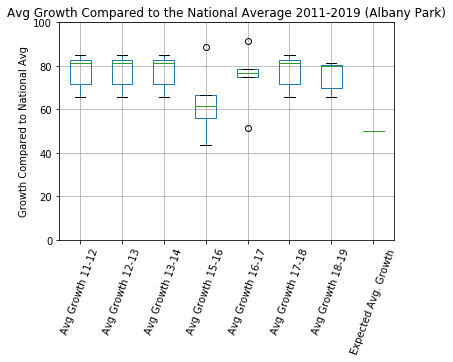

In [65]:
one_neighborhood.boxplot(column = ["Avg Growth 11-12", "Avg Growth 12-13","Avg Growth 13-14","Avg Growth 15-16",
                                   "Avg Growth 16-17","Avg Growth 17-18","Avg Growth 18-19", "Expected Avg. Growth"], rot = 70)
plt.ylabel("Growth Compared to National Avg")
plt.title("Avg Growth Compared to the National Average 2011-2019 (Albany Park)")
plt.ylim((0,100))
plt.savefig("Resources/Graphs/BoxPlotAlbanyPark.png", bbox_inches = "tight")

In [67]:
group1 = one_neighborhood["Avg Growth 11-12"]
group2 = one_neighborhood["Avg Growth 12-13"]
group3 = one_neighborhood["Avg Growth 13-14"]
group4 = one_neighborhood["Avg Growth 15-16"]
group5 = one_neighborhood["Avg Growth 16-17"]
group6 = one_neighborhood["Avg Growth 17-18"]
group7 = one_neighborhood["Avg Growth 18-19"]

sts.f_oneway(group1, group2, group3, group4, group5, group6, group7)

F_onewayResult(statistic=1.1327406404774358, pvalue=0.3693838300123264)

<Figure size 14400x28800 with 0 Axes>

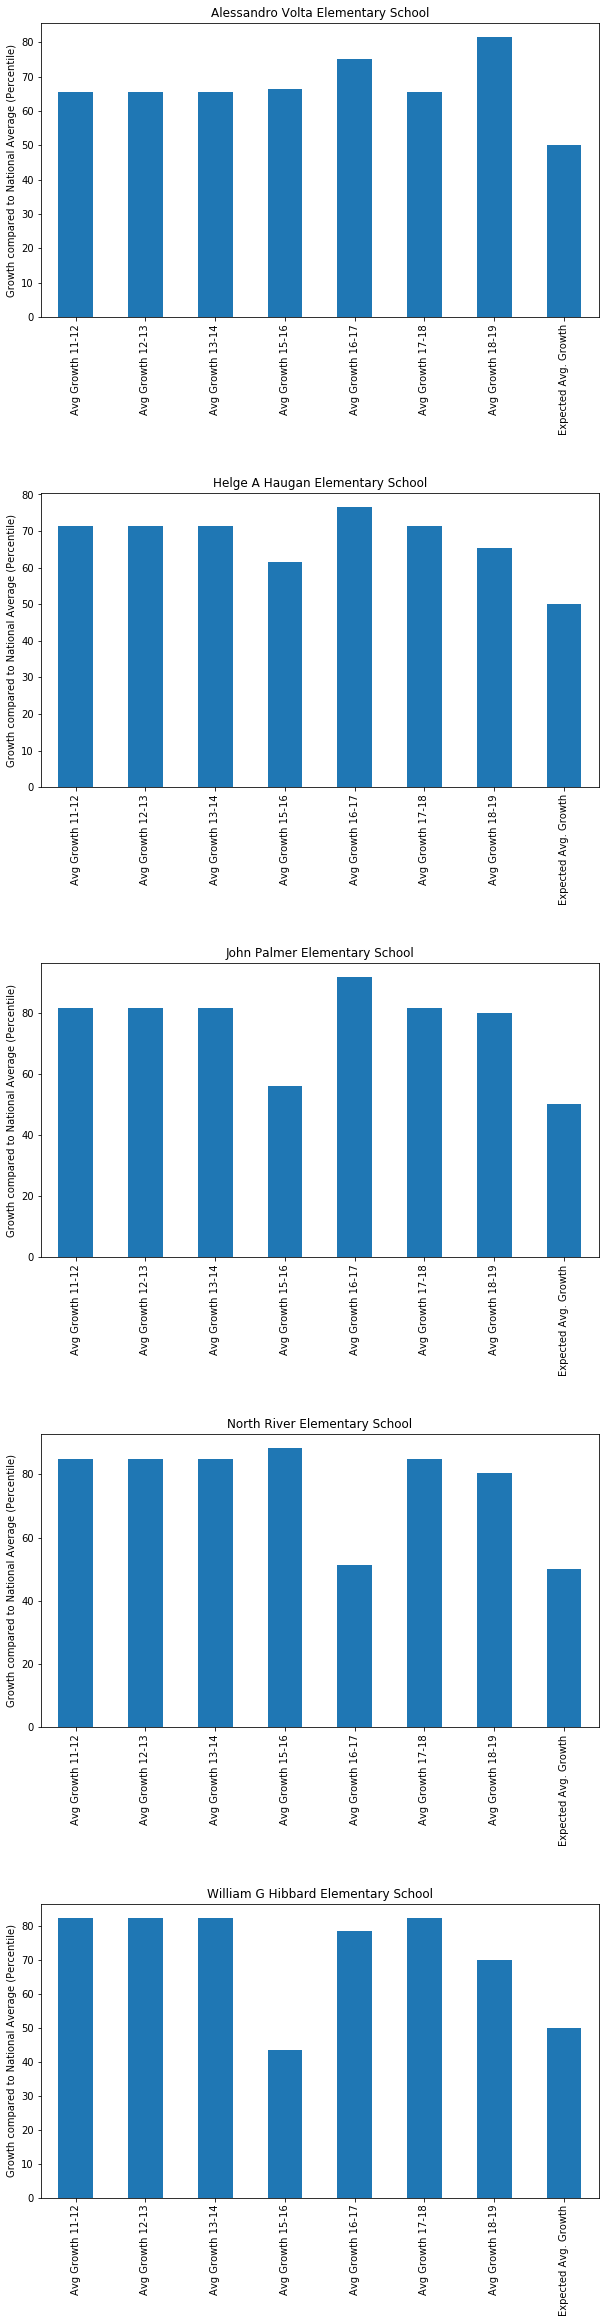

In [68]:
plt.figure(figsize=(200,400), facecolor='white')


figure, axes = plt.subplots(nrows=one_neighborhood.shape[0], ncols=1)

for i in range(0, one_neighborhood.shape[0]):

    subset = one_neighborhood.iloc[i,:]
    subset.plot(kind='bar',ax =axes[i],sharex = False, figsize=(10,40))
    axes[i].set_title(subset.name)
    axes[i].set_ylabel("Growth compared to National Average (Percentile)")

plt.subplots_adjust(hspace = 0.6)
plt.savefig(f"Resources/Graphs/OneNeighborhood.png", bbox_inches = "tight")
plt.show()

In [69]:
#Fills in a column that takes the average of the college enrollment for each school over the course of the school year from 2011-2012 to 2018-2019
final1112_hs["College Enrollment 2011-2012"] = final1112_hs.loc[:, "College_Enrollment_School_Pct_Year_1": 
                                                                "College_Enrollment_School_Pct_Year_2"].mean(axis = 1) 
final1213_hs["College Enrollment 2012-2013"] = final1213_hs.loc[:, "College_Enrollment_School_Pct_Year_1": 
                                                                "College_Enrollment_School_Pct_Year_2"].mean(axis = 1) 
final1314_hs["College Enrollment 2013-2014"] = final1314_hs.loc[:, "College_Enrollment_School_Pct_Year_1": 
                                                                "College_Enrollment_School_Pct_Year_2"].mean(axis = 1) 
final1516_hs["College Enrollment 2015-2016"] = final1516_hs.loc[:, "College_Enrollment_School_Pct_Year_1": 
                                                                "College_Enrollment_School_Pct_Year_2"].mean(axis = 1) 
final1617_hs["College Enrollment 2016-2017"] = final1617_hs.loc[:, "College_Enrollment_School_Pct_Year_1": 
                                                                "College_Enrollment_School_Pct_Year_2"].mean(axis = 1) 
final1718_hs["College Enrollment 2017-2018"] = final1718_hs.loc[:, "College_Enrollment_School_Pct_Year_1": 
                                                                "College_Enrollment_School_Pct_Year_2"].mean(axis = 1) 
final1819_hs["College Enrollment 2018-2019"] = final1819_hs.loc[:, "College_Enrollment_School_Pct_Year_1": 
                                                                 "College_Enrollment_School_Pct_Year_2"].mean(axis = 1) 
# Merged all the highschool data together into one from 2011-2019 excluding 2014-2015.
final13_hs = pd.merge(final1112_hs[["Long_Name", "X", "Y", "School_ID", "COMMAREA", "College Enrollment 2011-2012"]], 
                    final1213_hs[["Long_Name", "College Enrollment 2012-2013"]], on = "Long_Name", how = "outer")
final14_hs = pd.merge(final13_hs, final1314_hs[["Long_Name", "College Enrollment 2013-2014"]], on = "Long_Name", how = "outer")
final16_hs = pd.merge(final14_hs, final1516_hs[["Long_Name", "College Enrollment 2015-2016"]], on = "Long_Name", how = "outer")
final17_hs = pd.merge(final16_hs, final1617_hs[["Long_Name", "College Enrollment 2016-2017"]], on = "Long_Name", how = "outer")
final18_hs = pd.merge(final17_hs, final1718_hs[["Long_Name", "College Enrollment 2017-2018"]], on = "Long_Name", how = "outer")
final_hs = pd.merge(final18_hs, final1819_hs[["Long_Name", "College Enrollment 2018-2019"]], on = "Long_Name", how = "outer").dropna()


graphing_final = final_hs[["Long_Name", "COMMAREA", "College Enrollment 2011-2012", "College Enrollment 2012-2013", 
                           "College Enrollment 2013-2014", "College Enrollment 2015-2016", 
                           "College Enrollment 2016-2017", "College Enrollment 2017-2018", "College Enrollment 2018-2019"]]
graphing_final = graphing_final.rename(columns= {"COMMAREA": "Neighborhood"})

In [71]:
# reads in the median home price data to compare with the above data
path = "Resources/home_price_clean_year.csv"
median_price = pd.read_csv(path)


median_price = median_price.join(median_price["month_year"].str.split("-", n =2, expand = True))
median_price.rename(columns = {0:"Year", 1: "Month"}, inplace = True)
median_price

median_price[["City", "Neighborhood"]] = median_price.Region.str.split(" - ", expand = True)
median_price

no_neighborhood = median_price[median_price["Region"] == "Chicago, IL"].index
median_price.drop(no_neighborhood,inplace = True)

last_year = median_price[median_price["Year"] == "2020"].index
missing_year = median_price[median_price["Year"] == "2014"].index
median_price.drop(last_year, inplace = True)
median_price.drop(missing_year, inplace = True)

median_price
median_price["Median Sale Price"] = median_price["Median Sale Price"].astype(float)
median_price["Median Sale Price"] = median_price["Median Sale Price"].round()

median_price["Neighborhood"] = median_price["Neighborhood"].str.upper()
median_price

,Region,month_year,Median Sale Price,Homes Sold,New Listings,Inventory,Days on Market,Days on Market MoM,Days on Market YoY,Year,Month,City,Neighborhood
100,"Chicago, IL - Albany Park",2012-02,121.0,76,103.0,177.0,81.0,8.0,16.0,2012,02,"Chicago, IL",ALBANY PARK
101,"Chicago, IL - Albany Park",2012-03,121.0,74,120.0,166.0,114.0,33.0,25.0,2012,03,"Chicago, IL",ALBANY PARK
102,"Chicago, IL - Albany Park",2012-04,141.0,83,146.0,166.0,116.0,2.0,11.0,2012,04,"Chicago, IL",ALBANY PARK
103,"Chicago, IL - Albany Park",2012-05,153.0,90,148.0,151.0,70.0,-46.0,-38.0,2012,05,"Chicago, IL",ALBANY PARK
104,"Chicago, IL - Albany Park",2012-06,157.0,102,143.0,152.0,59.0,-12.0,-46.0,2012,06,"Chicago, IL",ALBANY PARK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25471,"Chicago, IL - Wrigleyville",2019-08,460.0,23,35.0,35.0,36.0,4.0,-2.0,2019,08,"Chicago, IL",WRIGLEYVILLE
25472,"Chicago, IL - Wrigleyville",2019-09,490.0,19,37.0,40.0,47.0,11.0,9.0,2019,09,"Chicago, IL",WRIGLEYVILLE
25473,"Chicago, IL - Wrigleyville",2019-10,490.0,17,34.0,34.0,43.0,-4.0,7.0,2019,10,"Chicago, IL",WRIGLEYVILLE
25474,"Chicago, IL - Wrigleyville",2019-11,470.0,20,24.0,23.0,51.0,8.0,17.0,2019,11,"Chicago, IL",WRIGLEYVILLE


In [72]:
# WILL BE ABLE TO GROUPBY NEIGHBORHOOD AND YEAR IF YOU USE THIS YOU DUMB
yearly_price = median_price.groupby(["Neighborhood","Year"]).mean()

yearly_price.loc["ALBANY PARK"]

,Median Sale Price,Homes Sold,New Listings,Inventory,Days on Market,Days on Market MoM,Days on Market YoY
Year,,,,,,,
2012,145.363636,91.363636,122.727273,144.272727,72.181818,-1.909091,-4.181818
2013,193.583333,92.333333,118.666667,112.083333,43.500000,-0.083333,-28.833333
2015,250.166667,101.250000,145.916667,142.416667,54.166667,1.083333,3.916667
2016,253.583333,116.083333,143.833333,122.833333,55.250000,-1.416667,1.083333
2017,279.083333,103.833333,121.750000,101.666667,46.583333,1.333333,-8.916667
2018,270.916667,94.083333,127.833333,97.833333,47.666667,-2.083333,1.166667
2019,298.166667,87.750000,120.416667,108.833333,48.333333,0.083333,0.583333


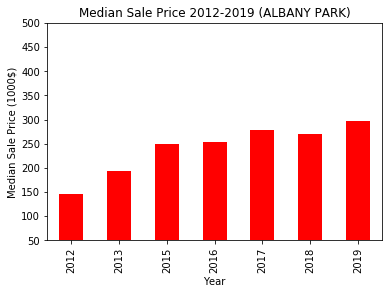

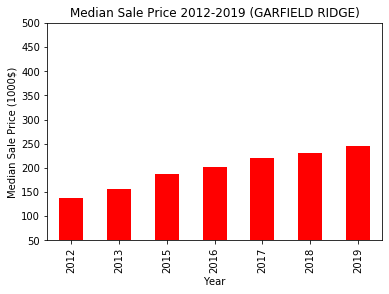

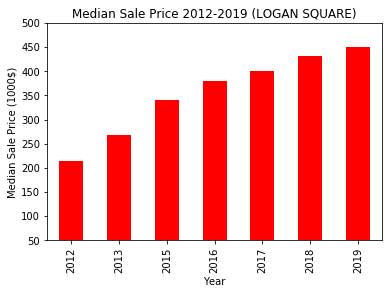

In [73]:
neighborhood_homeprice = ["ALBANY PARK", "GARFIELD RIDGE", "LOGAN SQUARE"]
neighborhood_homeprice


for i in range(len(neighborhood_homeprice)):
    neighborhoods = yearly_price.loc[neighborhood_homeprice[i]]

    
    neighborhoods.plot(kind = "bar", y = "Median Sale Price", color = 'r', legend = False, 
                   title = f"Median Sale Price 2012-2019 ({neighborhood_homeprice[i]})")
    
    plt.ylabel("Median Sale Price (1000$)")
    plt.ylim((50,500))

In [74]:
avg_growth = final_elem.groupby(["Neighborhood"]).mean()
medprice = yearly_price.iloc[:,0].unstack()
medprice

Year,2012,2013,2015,2016,2017,2018,2019
Neighborhood,,,,,,,
ALBANY PARK,145.363636,193.583333,250.166667,253.583333,279.083333,270.916667,298.166667
ANDERSONVILLE,293.727273,328.583333,369.416667,432.250000,419.333333,429.083333,396.083333
ARCHER HEIGHTS,121.000000,139.500000,175.583333,183.916667,204.333333,217.750000,230.916667
ARCHER HIGHLANDS,122.272727,141.666667,168.166667,194.333333,217.416667,218.083333,224.700000
ARMOUR SQUARE,257.727273,272.583333,257.416667,256.000000,283.500000,334.916667,305.833333
...,...,...,...,...,...,...,...
WILDWOOD,384.727273,370.500000,439.666667,487.916667,447.166667,446.333333,445.416667
WOODLAWN,39.000000,48.666667,70.000000,95.000000,144.250000,159.333333,180.750000
WOODLAWN RIDGE,47.181818,44.833333,100.083333,106.000000,135.250000,170.833333,225.416667


In [75]:
merged_df = pd.merge(avg_growth, medprice, on = "Neighborhood", how = "outer").dropna().round(2)
merged_df = merged_df.rename(columns = {"2012": "Med Price 2012 (1000s $)", "2013": "Med Price 2013 (1000s $)", "2015": "Med Price 2015 (1000s $)",
                                       "2016": "Med Price 2016 (1000s $)", "2017": "Med Price 2017 (1000s $)", "2018": "Med Price 2018 (1000s $)",
                                        "2019": "Med Price 2019 (1000s $)"})
merged_df["Color"] = np.random.rand(67,1)
merged_df["Expected Avg. Growth"] = 50

merged_df

,Avg Growth 11-12,Avg Growth 12-13,Avg Growth 13-14,Avg Growth 15-16,Avg Growth 16-17,Avg Growth 17-18,Avg Growth 18-19,Med Price 2012 (1000s $),Med Price 2013 (1000s $),Med Price 2015 (1000s $),Med Price 2016 (1000s $),Med Price 2017 (1000s $),Med Price 2018 (1000s $),Med Price 2019 (1000s $),Color,Expected Avg. Growth
Neighborhood,,,,,,,,,,,,,,,,
ALBANY PARK,77.20,77.20,77.20,63.20,74.60,77.20,75.50,145.36,193.58,250.17,253.58,279.08,270.92,298.17,0.932947,50
ARCHER HEIGHTS,89.50,89.50,89.50,66.00,54.50,89.50,60.50,121.00,139.50,175.58,183.92,204.33,217.75,230.92,0.437183,50
ARMOUR SQUARE,94.50,94.50,94.50,96.50,88.50,94.50,87.50,257.73,272.58,257.42,256.00,283.50,334.92,305.83,0.904024,50
ASHBURN,60.93,60.93,60.93,66.50,70.00,60.93,64.07,105.91,112.67,141.92,158.33,172.42,186.42,198.08,0.884797,50
AUBURN GRESHAM,61.31,61.31,61.31,42.38,71.81,61.31,60.81,47.00,44.83,58.33,85.00,92.67,112.75,142.08,0.613438,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WEST LAWN,76.17,76.17,76.17,60.83,74.17,76.17,69.67,114.09,123.17,150.75,167.58,182.25,197.75,211.08,0.127688,50
WEST PULLMAN,54.30,54.30,54.30,53.80,83.40,54.30,38.20,22.82,24.17,29.42,38.67,43.67,67.50,77.17,0.697713,50
WEST RIDGE,77.14,77.14,77.14,89.86,81.00,77.14,71.57,71.91,98.42,159.67,180.33,187.83,207.50,222.50,0.596941,50


In [76]:
range = [0,1,2,3,4,5,6]
years = ["2011-2012", "2012-2013", "2013-2014", "2015-2016", "2016-2017", "2017-2018", "2018-2019"]
neighborhood = merged_df.index.unique()

In [78]:
#calculate the critical value for the chi-square test
critical_value = sts.chi2.ppf(q = 0.95, df = 66)
print(f"The Critical value is: {critical_value}") 

The Critical value is: 85.96490744123096


The slope of the line is: y = 0.04x + 62.8
The r-squared is: 0.12644859355387736
The correlation between both factors is 0.36
The Chi Square is: Power_divergenceResult(statistic=600.0849279999999, pvalue=3.9054966876218193e-87)


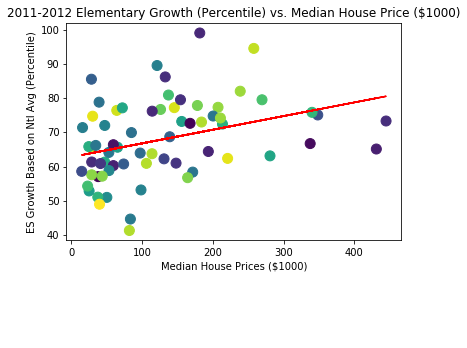

The slope of the line is: y = 0.03x + 63.05
The r-squared is: 0.11031467007532107
The correlation between both factors is 0.33
The Chi Square is: Power_divergenceResult(statistic=600.0849279999999, pvalue=3.9054966876218193e-87)


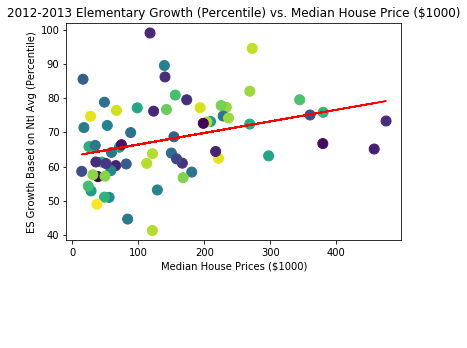

The slope of the line is: y = 0.03x + 61.94
The r-squared is: 0.13059708489791372
The correlation between both factors is 0.36
The Chi Square is: Power_divergenceResult(statistic=600.0849279999999, pvalue=3.9054966876218193e-87)


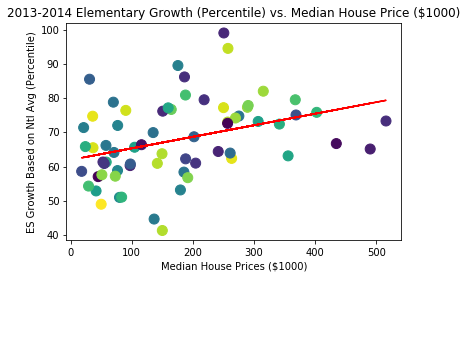

The slope of the line is: y = 0.06x + 48.57
The r-squared is: 0.2313901390329314
The correlation between both factors is 0.48
The Chi Square is: Power_divergenceResult(statistic=528.9300139999999, pvalue=1.9754861057245435e-73)


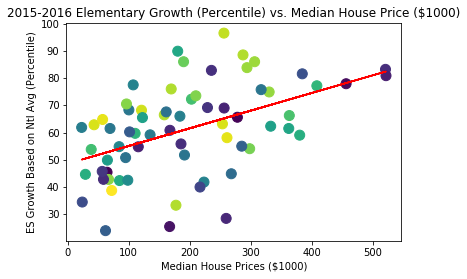

The slope of the line is: y = 0.01x + 65.87
The r-squared is: 0.023053456497611653
The correlation between both factors is 0.15
The Chi Square is: Power_divergenceResult(statistic=646.940972, pvalue=2.87189150725605e-96)


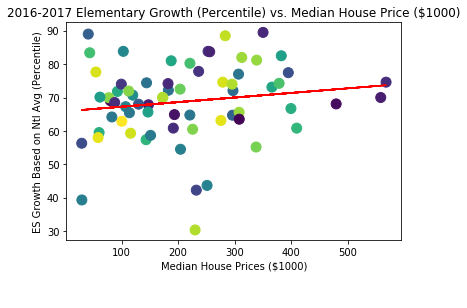

The slope of the line is: y = 0.03x + 60.39
The r-squared is: 0.12868794356916718
The correlation between both factors is 0.36
The Chi Square is: Power_divergenceResult(statistic=600.0849279999999, pvalue=3.9054966876218193e-87)


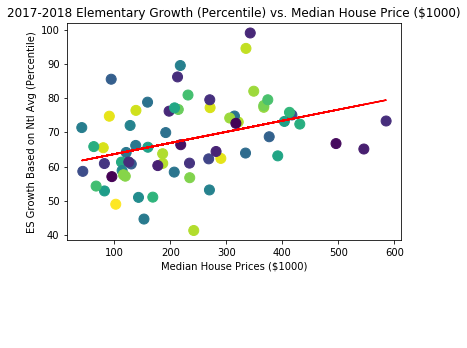

The slope of the line is: y = 0.03x + 54.08
The r-squared is: 0.10730407021246853
The correlation between both factors is 0.33
The Chi Square is: Power_divergenceResult(statistic=397.1141099999999, pvalue=9.031374715816492e-49)


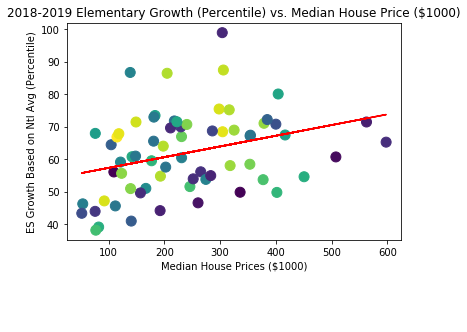

In [81]:
for i in range:
    x_values = merged_df.iloc[:,i+7]
    y_values = merged_df.iloc[:,i]
    chi_square = sts.chisquare(merged_df.iloc[:,i], merged_df['Expected Avg. Growth'])
    correlation = sts.pearsonr(x_values,y_values)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    print(f"The slope of the line is: {line_eq}")
    print(f"The r-squared is: {rvalue**2}")
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    print(f"The Chi Square is: {chi_square}")
    
    plt.scatter(x_values, y_values, c = merged_df["Color"], s=100)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.ylabel('ES Growth Based on Ntl Avg (Percentile)')
    plt.xlabel('Median House Prices ($1000)')
    plt.title(f"{years[i]} Elementary Growth (Percentile) vs. Median House Price ($1000)")
    plt.savefig(f"Resources/Graphs/{years[i]}Scatter.png", bbox_inches = "tight")
    plt.show()

In [ ]:
# Each statistic over the critical value and a low p-value tells us that our data is statistically significant and proves
# that this conclusion was not reached by chance.